In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Define the dimensions of the input image
img_width = 128
img_height = 128

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (img_width, img_height))
    image = image / 255.0
    return image

# Path to the sample image
sample_image_path = '/content/car-blue-concept-wheel-602213.jpeg'
# sample_image_path = '/content/shutterstock.jpg'
# sample_image_path = '/content/windmill-water-church-agriculture-161123.jpeg'
# sample_image_path = '/content/Untitled.jpeg'

# Preprocess the sample image
sample_image = preprocess_image(sample_image_path)

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Watermark Detection/Model/model.h5')

# Perform inference
prediction = model.predict(np.expand_dims(sample_image, axis=0))

# Extract the confidence or probability of the prediction
confidence = prediction[0][0]

# Interpret the prediction based on the confidence
if confidence > 0.5:
    print(f'The image contains a watermark with a confidence of {confidence:.2f}')
else:
    print(f'The image does not contain a watermark with a confidence of {1-confidence:.2f}')


1/1 [==============================] - 0s 77ms/step
The image does not contain a watermark with a confidence of 0.70


1/1 [==============================] - 0s 102ms/step
The image contains a watermark with a confidence of 1.00
1/1 [==============================] - 0s 33ms/step


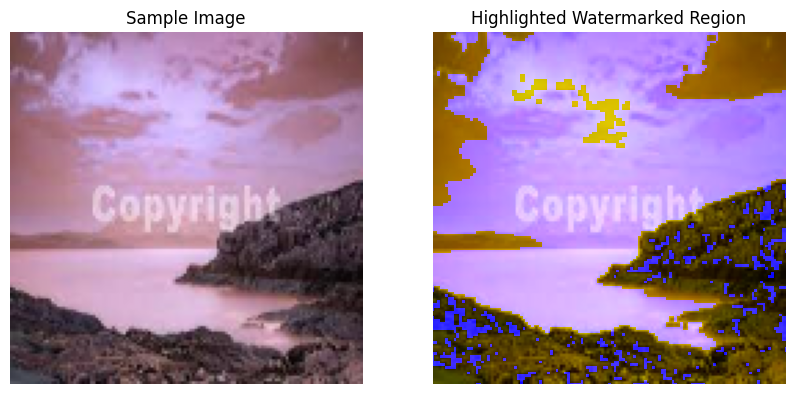

In [10]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

img_width = 128
img_height = 128

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (img_width, img_height))
    image = image / 255.0
    return image

# Path to the sample image
#sample_image_path = '/content/car-blue-concept-wheel-602213.jpeg'
#sample_image_path = '/content/shutterstock.jpg'
#sample_image_path = '/content/windmill-water-church-agriculture-161123.jpeg'
sample_image_path = '/content/Untitled.jpeg'


# Preprocess the sample image
sample_image = preprocess_image(sample_image_path)

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Watermark Detection/Model/model.h5')

# Perform inference
prediction = model.predict(np.expand_dims(sample_image, axis=0))
confidence = prediction[0][0]

# Interpret the prediction
if confidence > 0.5:
    print(f'The image contains a watermark with a confidence of {confidence:.2f}')

    # Get the predicted mask
    predicted_mask = model.predict(np.expand_dims(sample_image, axis=0))

    # Threshold the predicted mask to get the watermarked region
    threshold = 0.5
    watermarked_region = (predicted_mask > threshold).astype(np.uint8)

    # Resize the watermarked region mask to the original image size
    watermarked_region = cv2.resize(watermarked_region[0], (sample_image.shape[1], sample_image.shape[0]))

    # Create an overlay image with the same dimensions as the sample image
    overlay = np.zeros_like(sample_image)

    # Assign red color to the watermarked region in the overlay
    overlay[np.where(watermarked_region == 1)] = [0, 0, 255]

    # Apply the overlay to the sample image using bitwise_or operation
    highlighted_image = cv2.bitwise_or(sample_image, overlay)

    # Display the images using matplotlib.pyplot
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_image)
    plt.title('Sample Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(highlighted_image)
    plt.title('Highlighted Watermarked Region')
    plt.axis('off')

    plt.show()

else:
    print(f'The image does not contain a watermark with a confidence of {1-confidence:.2f}')
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_image)
    plt.title('Sample Image')
    plt.axis('off')
    plt.show()
